In [47]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
# pd.options.display.max_columns
pd.set_option("display.max_colwidth",200)
pd.set_option("display.max_columns",20)
pd.set_option('float_format', '{:.3f}'.format)

In [48]:
# Load Usage data
with open('App_usage_trace.txt') as f:
    lines = f.readlines()#[:100000]
    df = []
    for line in lines:
        data = line.split()
        df.append(data)
usage = pd.DataFrame(df, columns=['uid','timestamp', 'loc', 'app_id','traffic'])
usage['traffic'] = usage['traffic'].astype('float64') / 1e6 # Convert traffic to MB
usage['timestamp'] = usage['timestamp'].apply(lambda x: datetime.strptime(x, "%Y%m%d%H%M%S")) # Convert to datetime object
usage['loc'] = usage['loc'].astype('int64')

# Load App2Category data
with open('App2Category.txt') as f:
    lines = f.readlines()
    df = []
    for line in lines:
        data = line.split()
        df.append(data)
app2cat = pd.DataFrame(df, columns=['app_id','cat_id'])

# Load base station POI data
base_poi = pd.read_csv("base_poi.txt", delimiter='\t')

# Load Category dictionary
cat = pd.read_csv("Categorys.txt", delimiter='\t', header = None)
cat.columns = ['cat_id','category']
# cat.set_index('cat_id', inplace=True)
cat = cat.astype('str')

# #Load most_poi file
# most_poi = pd.read_csv("base_poi_edited.txt", delimiter='\t')

print("< ---- Basic information ---- >")
print("- {} base stations. {} entries".format(base_poi.shape[0], usage.shape[0]))
print()
print("< ---- Unique users ---- >")
print("- {} unique users".format(len(usage['uid'].unique())))
print("< ---- Unique location ---- >")
print("- {} unique users".format(len(usage['loc'].unique())))
print("< ---- Unique application ---- >")
print("- {} unique users".format(len(usage['app_id'].unique())))


< ---- Basic information ---- >
- 9851 base stations. 4171950 entries

< ---- Unique users ---- >
- 871 unique users
< ---- Unique location ---- >
- 6739 unique users
< ---- Unique application ---- >
- 1696 unique users


# Basic Descriptive Statistics

In [49]:
usage

,uid,timestamp,loc,app_id,traffic
0,0,2016-04-20 08:13:19,8194,361,0.002
1,0,2016-04-20 08:13:20,8194,361,0.002
2,0,2016-04-20 08:13:22,8194,361,0.004
3,0,2016-04-20 08:13:30,8194,361,0.001
4,0,2016-04-20 08:13:31,8194,361,0.002
...,...,...,...,...,...
4171945,999,2016-04-26 22:19:17,413,5,0.003
4171946,999,2016-04-26 22:19:21,413,5,0.001
4171947,999,2016-04-26 22:20:26,413,5,0.001
4171948,999,2016-04-26 22:34:13,413,5,0.001


## User

In [50]:
user_count = usage.groupby(["uid"]).size().reset_index()
user_count.columns = ['uid','count']
user_count.describe()

,count
count,871.000
mean,4789.839
std,38407.519
min,4.000
25%,647.500
50%,1659.000
75%,3534.000
max,1098748.000


In [51]:
#show users with top5 highest and lowest connection
user_count.sort_values(by = 'count',ascending= False)

,uid,count
816,942,1098748
652,772,228275
718,837,90381
717,836,62062
714,832,61522
...,...,...
353,468,10
85,186,9
148,252,7
189,295,7


## Application

In [52]:
usage_catid = pd.merge(app2cat, usage, left_on="app_id", right_on= "app_id")
usage_cat = pd.merge(cat,usage_catid, left_on= "cat_id", right_on="cat_id")
usage_cat

,cat_id,category,app_id,uid,timestamp,loc,traffic
0,0,'Utilities',15,138,2016-04-24 11:30:16,5116,0.023
1,0,'Utilities',15,138,2016-04-24 11:30:25,5116,0.027
2,0,'Utilities',15,138,2016-04-24 11:30:26,5116,0.053
3,0,'Utilities',15,138,2016-04-24 11:30:27,5116,0.061
4,0,'Utilities',15,138,2016-04-24 11:30:28,5116,0.057
...,...,...,...,...,...,...,...
4171945,19,'sports',1366,942,2016-04-26 20:14:50,2970,0.001
4171946,19,'sports',1366,942,2016-04-26 20:15:13,2970,0.001
4171947,19,'sports',1366,942,2016-04-26 20:16:43,2970,0.001
4171948,19,'sports',1366,942,2016-04-26 20:17:42,2970,0.002


In [53]:
app_count = usage_cat.groupby(["app_id"]).size().reset_index()
app_count.columns = ['app_id', 'count']
app_count.describe()

,count
count,1696.000
mean,2459.876
std,24721.819
min,1.000
25%,113.750
50%,353.000
75%,978.500
max,898308.000


In [54]:
app_count.sort_values(by = 'count',ascending= False)

,app_id,count
894,2,898308
0,1,363187
1201,5,215898
1,10,105502
1099,4,85708
...,...,...
1145,443,1
580,1623,1
784,1862,1
473,1505,1


## App category

In [55]:
app_cat = usage_cat.groupby(["category"]).size().reset_index()
app_cat.columns = ['category','count']
app_cat.describe()

,count
count,20.000
mean,208597.500
std,437869.589
min,85.000
25%,8834.000
50%,75996.500
75%,183250.250
max,1855905.000


In [56]:
app_cat.sort_values(by = 'count',ascending= False)

,category,count
14,"'Social\_Networking','wechat','linkedin','weibo'",1855905
16,'Utilities',921286
7,"'Lifestyle ','meituan'",233899
9,'Navigation',219338
10,'News',195752
8,'Music',179083
15,'Travel',124059
3,'Entertainment',100143
5,'Games',85970
11,'Photo&Video',85451


## Location

In [57]:
loc_count = usage_cat.groupby(["loc"]).size().reset_index()
loc_count.columns = ['base_station_id','count']
loc_count.describe()

,base_station_id,count
count,6739.000,6739.000
mean,4956.578,619.076
std,2800.131,1245.686
min,0.000,1.000
25%,2642.500,48.000
50%,4941.000,211.000
75%,7417.500,636.000
max,9849.000,24386.000


In [58]:
loc_count.sort_values(by = 'count',ascending= False)

,base_station_id,count
2184,3346,24386
4908,7141,18676
6332,9215,16018
2665,3999,14153
6680,9718,12981
...,...,...
3764,5437,1
5652,8256,1
5257,7746,1
1031,1582,1


## User-Traffic

In [59]:
usage

,uid,timestamp,loc,app_id,traffic
0,0,2016-04-20 08:13:19,8194,361,0.002
1,0,2016-04-20 08:13:20,8194,361,0.002
2,0,2016-04-20 08:13:22,8194,361,0.004
3,0,2016-04-20 08:13:30,8194,361,0.001
4,0,2016-04-20 08:13:31,8194,361,0.002
...,...,...,...,...,...
4171945,999,2016-04-26 22:19:17,413,5,0.003
4171946,999,2016-04-26 22:19:21,413,5,0.001
4171947,999,2016-04-26 22:20:26,413,5,0.001
4171948,999,2016-04-26 22:34:13,413,5,0.001


In [60]:
user_traffic = usage[["uid","traffic"]].groupby(["uid"]).sum().reset_index()
user_traffic.columns = ["uid", "traffic_sum_MB"]

In [61]:
user_traffic.describe()

,traffic_sum_MB
count,871.000
mean,77.769
std,664.596
min,0.004
25%,5.022
50%,17.835
75%,47.830
max,18770.284


In [62]:
user_traffic.sort_values(by = 'traffic_sum_MB',ascending= False)

,uid,traffic_sum_MB
816,942,18770.284
652,772,4756.294
718,837,1594.748
714,832,1243.804
549,667,1178.067
...,...,...
468,587,0.035
67,169,0.034
148,252,0.009
189,295,0.007


# Concate Dataset for graphs

In [63]:
#sort the dataset by time
usage = usage.sort_values(by = 'timestamp')

In [64]:
#round the timestamp to the closest 15 min interval
usage['rounded_15min']= usage['timestamp'].dt.round('15min')

In [65]:
usage

,uid,timestamp,loc,app_id,traffic,rounded_15min
2807379,941,2016-04-20 00:00:00,6049,2,0.001,2016-04-20 00:00:00
2817702,942,2016-04-20 00:00:03,9803,350,0.001,2016-04-20 00:00:00
2817701,942,2016-04-20 00:00:03,6406,15,0.000,2016-04-20 00:00:00
424540,325,2016-04-20 00:00:03,2654,127,0.001,2016-04-20 00:00:00
424541,325,2016-04-20 00:00:03,2654,1361,0.047,2016-04-20 00:00:00
...,...,...,...,...,...,...
135608,174,2016-04-26 23:48:22,212,55,0.002,2016-04-26 23:45:00
135609,174,2016-04-26 23:48:25,212,55,0.002,2016-04-26 23:45:00
135610,174,2016-04-26 23:48:26,212,55,0.002,2016-04-26 23:45:00
135611,174,2016-04-26 23:48:37,212,55,0.005,2016-04-26 23:45:00


In [66]:
#Load Most_poi file
# most_poi = pd.read_csv("base_poi_edited.txt", delimiter='\t')
# most_poi = most_poi[["BaseID","Most_POI"]]
# most_poi.head()

In [67]:
# usage_mostpoi = pd.merge(most_poi, usage, left_on="BaseID", right_on= "loc") # (merge most_poi with usage)
# usage_mostpoi = usage_mostpoi.sort_values(by = 'timestamp') # sort merged by time
# usage_mostpoi.drop(columns=["BaseID"]) # drop duplicate (Base_ID and loc are same)
# usage_mostpoi

In [68]:
#to check if it is sucessfully grouped by 15-mins interval
# usage_mostpoi.loc[(usage_mostpoi["rounded_15min"] == "2016-04-20 00:00:00") & (usage_mostpoi["Most_POI"] == "Business affairs")]

In [69]:
# df = usage_mostpoi.groupby(['rounded_15min', 'Most_POI']).size().reset_index()
# df

In [70]:
# df.to_csv("C://Users//natha//Desktop//Capstone_local_save//Orginal Dataset//Count_15m.csv")

# Graph in Python

## Create the dataframe needed for scatter plot

In [71]:
import seaborn as sns

In [72]:
#get the count of local occurance within the interval
loc_15min = usage.groupby(['rounded_15min', 'loc']).size().reset_index()
# loc_15min['rounded_15min'] = loc_15min['rounded_15min'].dt.strftime("%m-%d %H:%M")
loc_15min

,rounded_15min,loc,0
0,2016-04-20 00:00:00,668,1
1,2016-04-20 00:00:00,1332,4
2,2016-04-20 00:00:00,1683,12
3,2016-04-20 00:00:00,1776,28
4,2016-04-20 00:00:00,2583,3
...,...,...,...
222034,2016-04-26 23:45:00,9427,1
222035,2016-04-26 23:45:00,9506,4
222036,2016-04-26 23:45:00,9655,7
222037,2016-04-26 23:45:00,9718,38


## For the entire period

In [73]:
# dont click on this graph
# problem is we need to get rid of the year
# sns.scatterplot(x = "rounded_15min", y = "loc" , hue = loc_15min[0], data = loc_15min)
# plt.title('Base-station count vs. 15-mins interval')
# plt.xlabel('Datetime')
# plt.ylabel('Base_station ID')

## Seperate weekdays from weekends
### 23-24 are weekends, 20-22,25-26 are weekdays

## Weekends: Apr 25-26

In [74]:
# seperate weekends from weekdays in the dataset
weekends_loc = loc_15min[(loc_15min["rounded_15min"].dt.day == 25)|(loc_15min["rounded_15min"].dt.day == 26)]
#get rid of the year
weekends_loc["rounded_15min"] = weekends_loc["rounded_15min"].dt.strftime("%m-%d %H:%M")
weekends_loc.columns = ["interval", "base_station_id", "count"]
weekends_loc.to_csv("C://Users//natha//Desktop//Capstone_local_save//Orginal Dataset//weekdays_loc.csv")

<ipython-input-74-6eeec69e1e11>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekends_loc["rounded_15min"] = weekends_loc["rounded_15min"].dt.strftime("%m-%d %H:%M")


In [75]:
# sns.scatterplot(x = "interval", y = "base_station_id" , hue = weekends_25_loc["count"], data = weekends_25_loc)
# plt.title('Apr 25 2016: Base-station count vs. 15-mins interval')
# plt.xlabel('Datetime')
# plt.ylabel('Base_station ID')

# for larger size graph:
# plt.title('Weekends: Base-station count vs. 15-mins interval',size=30)
# plt.xlabel('Datetime',size=20)
# plt.ylabel('Base_station ID',size=20)
# plt.rcParams['figure.figsize']=(40,40)

## Weekdays

In [76]:
#same for weekdays
weekdays_loc = loc_15min[(loc_15min["rounded_15min"].dt.day != 25) & (loc_15min["rounded_15min"].dt.day != 26)]
weekdays_loc["rounded_15min"] = weekdays_loc["rounded_15min"].dt.strftime("%m-%d %H:%M")
weekdays_loc.columns = ["interval", "base_station_id", "count"]
weekdays_loc.to_csv("C://Users//natha//Desktop//Capstone_local_save//Orginal Dataset//weekdays_loc.csv")

<ipython-input-76-07f7d6204111>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekdays_loc["rounded_15min"] = weekdays_loc["rounded_15min"].dt.strftime("%m-%d %H:%M")


In [77]:
# sns.scatterplot(x = "rounded_15min", y = "loc" , hue = weekdays_loc[0], data = weekdays_loc)
# plt.title('Weekdays: Base-station count vs. 15-mins interval')
# plt.xlabel('Datetime')
# plt.ylabel('Base_station ID')
# plt.title('Weekdays: Base-station count vs. 15-mins interval',size=30)
# plt.xlabel('Datetime',size = 20)
# plt.ylabel('Base_station ID',size=20)
# plt.rcParams['figure.figsize']=(40,40)

## Heatmap

## Weekdays

In [78]:
#create a offset columns using shift, to the the combination of current base_station and its next station
weekdays_loc["loc_shift"] = weekdays_loc["base_station_id"].shift(-1, fill_value = 0)
weekdays_loc

<ipython-input-78-c47300ec967c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekdays_loc["loc_shift"] = weekdays_loc["base_station_id"].shift(-1, fill_value = 0)


,interval,base_station_id,count,loc_shift
0,04-20 00:00,668,1,1332
1,04-20 00:00,1332,4,1683
2,04-20 00:00,1683,12,1776
3,04-20 00:00,1776,28,2583
4,04-20 00:00,2583,3,2654
...,...,...,...,...
156232,04-24 23:45,9506,10,9509
156233,04-24 23:45,9509,5,9510
156234,04-24 23:45,9510,3,9569
156235,04-24 23:45,9569,1,9600


In [79]:
# check the number of unique station, median
print("No. of unique base station: ", len(weekdays_loc["base_station_id"].unique()))
print("Median of location count: ", weekdays_loc["count"].median())

No. of unique base station:  6420
Median of location count:  5.0


In [80]:
#group loc column and its offset column, get the count for the combination, fill non-exsit with 0
weekdays_heatmap = weekdays_loc.groupby(['base_station_id','loc_shift']).size().unstack(fill_value=0)
# we only want important figure, here set a theshold, only show number >=15, fill others with nan so later can get rid of it with dropna()
weekdays_heatmap = weekdays_heatmap.where(weekdays_heatmap >=50, np.nan)
weekdays_heatmap

loc_shift,0,2,4,10,11,12,15,16,17,26,...,9832,9833,9836,9837,9838,9839,9840,9844,9845,9849
base_station_id,,,,,,,,,,,,,,,,,,,,,
0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
10,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
11,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9839,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
9840,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
9844,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [81]:
# set the threshhold of dropna to ALL so only keep rows with ALL nan elements
weekdays_heatmap = weekdays_heatmap.dropna(how='all')
#do the same to columns
weekdays_heatmap =  weekdays_heatmap.dropna(how='all',axis = 1)
#fill remaining nan with 0 for viz
weekdays_heatmap = weekdays_heatmap.fillna(0)
weekdays_heatmap

loc_shift,688,770,1337,1449,1610,1611,1613,1683,1776,2267,...,7639,7670,7680,8382,8841,9506,9508,9560,9718,9763
base_station_id,,,,,,,,,,,,,,,,,,,,,
671,59.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
767,0.000,50.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1336,0.000,0.000,58.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1448,0.000,0.000,0.000,73.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1609,0.000,0.000,0.000,0.000,55.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1610,0.000,0.000,0.000,0.000,0.000,52.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1611,0.000,0.000,0.000,0.000,0.000,0.000,51.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1677,0.000,0.000,0.000,0.000,0.000,0.000,0.000,96.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1775,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,51.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


Text(114.0, 0.5, 'Base station')

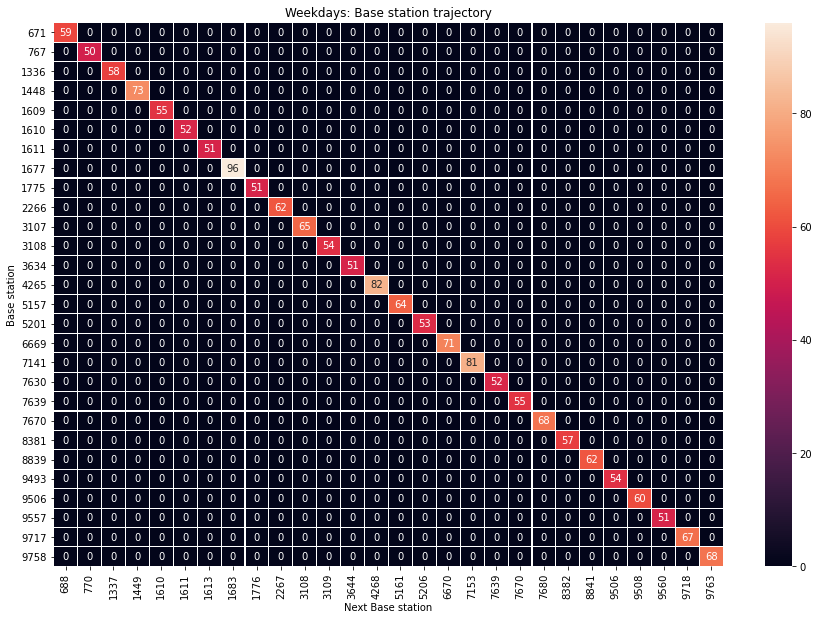

In [82]:
fig, ax = plt.subplots(figsize=(15,10))    
ax = sns.heatmap(weekdays_heatmap,linewidths=.05,annot=True)
plt.title('Weekdays: Base station trajectory')
plt.xlabel('Next Base station')
plt.ylabel('Base station')

## Weekends

In [83]:
#same thing with weekends
weekends_loc["loc_shift"] = weekends_loc["base_station_id"].shift(-1, fill_value = 0)
weekends_loc

<ipython-input-83-366612560112>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekends_loc["loc_shift"] = weekends_loc["base_station_id"].shift(-1, fill_value = 0)


,interval,base_station_id,count,loc_shift
156237,04-25 00:00,70,3,370
156238,04-25 00:00,370,23,371
156239,04-25 00:00,371,1,413
156240,04-25 00:00,413,1,440
156241,04-25 00:00,440,1,445
...,...,...,...,...
222034,04-26 23:45,9427,1,9506
222035,04-26 23:45,9506,4,9655
222036,04-26 23:45,9655,7,9718
222037,04-26 23:45,9718,38,9804


In [84]:
print("No. of unique base station: ", len(weekends_loc["base_station_id"].unique()))
print("Median of location count: ", weekends_loc["count"].median())

No. of unique base station:  5305
Median of location count:  5.0


In [85]:
weekends_heatmap = weekends_loc.groupby(['base_station_id','loc_shift']).size().unstack(fill_value=0)
weekends_heatmap = weekends_heatmap.where(weekends_heatmap >=30, np.nan)
weekends_heatmap

loc_shift,0,6,7,10,11,12,13,15,16,17,...,9803,9804,9805,9831,9832,9833,9836,9837,9838,9839
base_station_id,,,,,,,,,,,,,,,,,,,,,
0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
6,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
7,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
10,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
11,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9833,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
9836,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
9837,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [86]:
weekends_heatmap = weekends_heatmap.dropna(how="all")
weekends_heatmap =  weekends_heatmap.dropna(how="all", axis = 1)
# weekdays_heatmap = weekdays_heatmap.to_numpy()
weekends_heatmap = weekends_heatmap.fillna(0)
weekends_heatmap

loc_shift,89,1449,2663,3352,3644,4283,4697,4851,5696,5981,...,8503,8510,8739,8841,9517,9560,9724,9763,9776,9833
base_station_id,,,,,,,,,,,,,,,,,,,,,
85,48.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1448,0.000,31.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2660,0.000,0.000,37.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3346,0.000,0.000,0.000,35.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3634,0.000,0.000,0.000,0.000,33.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4279,0.000,0.000,0.000,0.000,0.000,30.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4685,0.000,0.000,0.000,0.000,0.000,0.000,35.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4850,0.000,0.000,0.000,0.000,0.000,0.000,0.000,34.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5695,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,44.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


Text(114.0, 0.5, 'Base station')

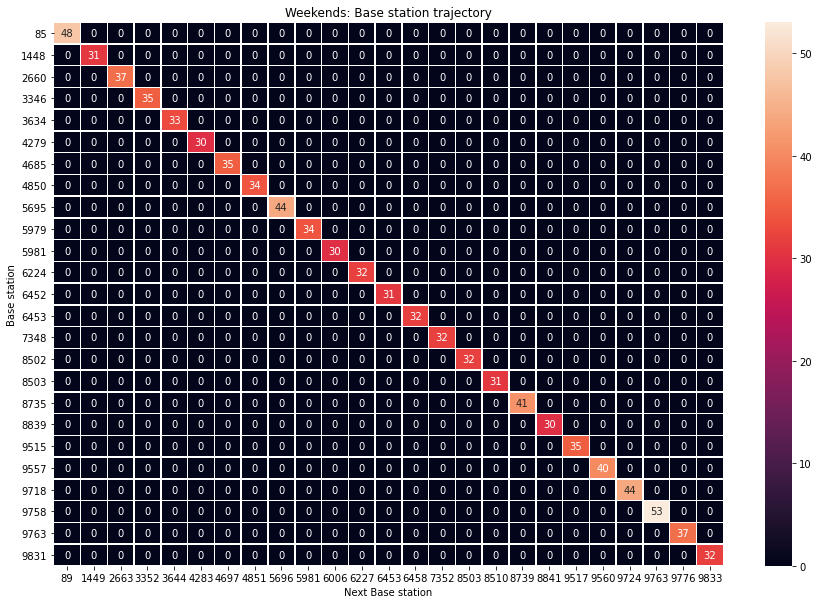

In [87]:
fig, ax = plt.subplots(figsize=(15,10))    
ax = sns.heatmap(weekends_heatmap, linewidths=.5,annot=True)
plt.title('Weekends: Base station trajectory')
plt.xlabel('Next Base station')
plt.ylabel('Base station')

# Flow Chart

In [88]:
# cat

In [89]:
# usage_mostpoi = pd.merge(cat, usage_mostpoi, left_on="cat_id", right_on= "app_id")
# usage